# Sessió 2 - Dades, patrons i models

**Objectiu general:** Entendre com els models detecten patrons a partir de dades, com es mesura l'error i com s'ajusten els paràmetres d'un model senzill.

**Què farem**
- Crearem un conjunt de dades amb patró **lineal**.
- Visualitzarem el núvol de punts veurem la tendència.
- Calcularem l'**error** amb **MSE** d'unes línies candidates.
- Visualitzar la relació entre alçada (m) i pes (kg)
- Ajustar una línia de regressió (y = a·x + b)
- Avaluar el model amb MSE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dades
Crearem les dades *d'alçada* i *pes*, els hi afegirem soroll

In [2]:
alçada_A = np.array([1.55, 1.58, 1.60, 1.62, 1.65, 1.67, 1.68, 1.70, 1.72, 1.74,
                     1.76, 1.78, 1.80, 1.82, 1.84, 1.86, 1.88, 1.90, 1.92, 1.95])
pes_A    = np.array([  53,   56,   58,   60,   63,   64,   66,   68,   70,   73,
                       75,   78,   80,   82,   84,   86,   88,   91,   93,   96])
df_A = pd.DataFrame({'Alçada_m': alçada_A, 'Pes_kg': pes_A})

# Afegim soroll i més dades
rng = np.random.default_rng(42)
n = 120
altura_B = rng.uniform(1.55, 1.95, size=n)
pes_B = 25 * altura_B + 20 + rng.normal(0, 1, size=n)
df_B = pd.DataFrame({'Alçada_m': altura_B, 'Pes_kg': pes_B})

DATASET = 'B'
df = df_A.copy() if DATASET == 'A' else df_B.copy()
df.head()

,Alçada_m,Pes_kg
0,1.859582,68.091339
1,1.725551,62.899429
2,1.893439,66.312482
3,1.828947,65.902956
4,1.587671,59.911770


## Visualització
Mostrem el núvol de punts `Alçada_m` vs `Pes_kg` i observem el patró de comportament

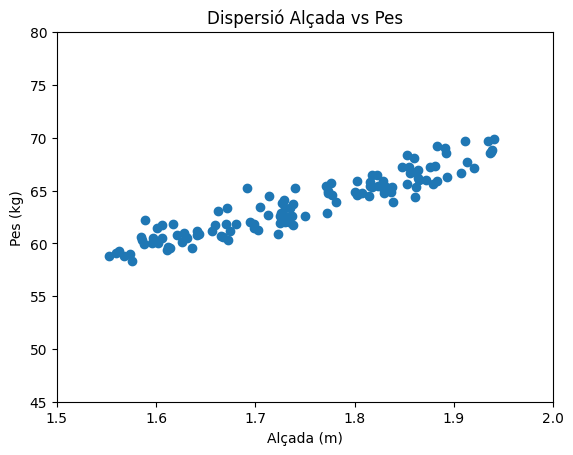

In [3]:
plt.figure()
plt.scatter(df['Alçada_m'], df['Pes_kg'])
plt.xlabel('Alçada (m)')
plt.ylabel('Pes (kg)')
plt.title('Dispersió Alçada vs Pes')
plt.xlim(1.50, 2.00)   
plt.ylim(45, 80) 
plt.show()

## Visualització junt amb la línia de tendència - equació de la recta

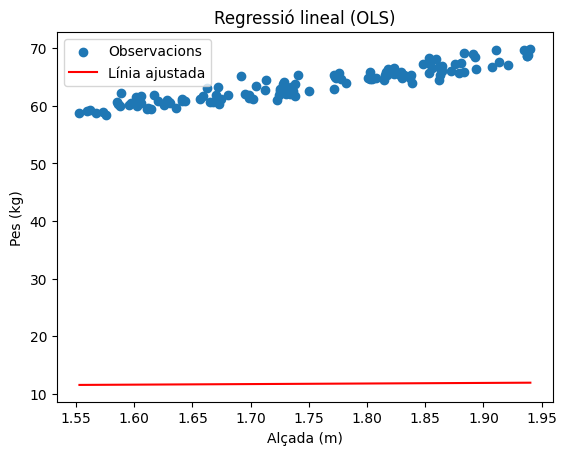

In [4]:
def plot(X, y, a_hat, b_hat): 
    x_line = np.linspace(X.min(), X.max(), 200)
    y_line = a_hat * x_line + b_hat
    plt.figure()
    plt.scatter(X, y, label='Observacions')
    plt.plot(x_line, y_line, label='Línia ajustada', color='red')
    plt.xlabel('Alçada (m)')
    plt.ylabel('Pes (kg)')
    plt.title('Regressió lineal (OLS)')
    plt.legend()
    plt.show()

X = df['Alçada_m'].to_numpy()
y = df['Pes_kg'].to_numpy()
a = 1
b = 10
plot(X, y, a, b)

### Preguntes 
1) Prova de variar els valors de *a* i *b*.
2) Què passa al variar un paràmetre i l'altre? És el que esperaríem?
3) Quina recta descriuria millor aquest comportament?

## 2. Què és el MSE (Mean Squared Error) 🧮

El **MSE** és una mesura molt utilitzada per saber com de bé (o de malament) 
un **model de predicció** s’ajusta a les dades reals.

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$

On:
- $ y_i $ són els valors reals,
- $ \hat{y_i} $ són les prediccions del model,
- $ n $ és el nombre total de mostres.

👉 **Com interpretar-ho:**
- Si el MSE és **petit**, el model fa bones prediccions (errors petits).
- Si és **gran**, el model s’equivoca molt.

El MSE penalitza més fortament els errors grans perquè els **eleva al quadrat**.

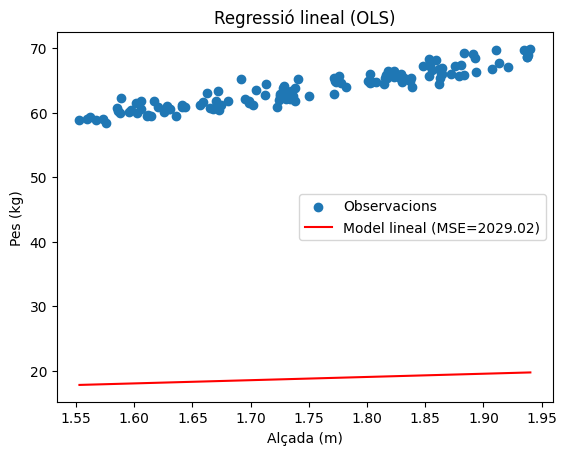

In [6]:
def mse(a, b, X, y):
    y_pred = a * X + b
    return np.mean((y - y_pred)**2)

def plot_mse(X, y, a_hat, b_hat): 

    x_line = np.linspace(X.min(), X.max(), 200)
    y_line = a_hat * x_line + b_hat
    
    mse_val = mse(a_hat, b_hat, X, y)
    plt.figure()
    plt.scatter(X, y, label='Observacions')
    plt.plot(x_line, y_line, label=f'Model lineal (MSE={mse_val:.2f})', color='red')
    plt.xlabel('Alçada (m)')
    plt.ylabel('Pes (kg)')
    plt.title('Regressió lineal (OLS)')
    plt.legend()
    plt.show()

# Prova de variar els valors de a i b. Busca el mínim MSE
a = 5
b = 10
plot_mse(X, y, a, b)

## 5. Mini-exercicis
1. Calcula l'error el **MSE** per `a=22`, `b=35` a mà, respecte el punt x=1.75 i y=63.
2. Prova tres valors de `a` i `b` diferents i apunta quin dóna el MSE més baix.
4. Escriu un bucle que provi múltiples valors de `w` i `b` i es quedi amb la parella amb menor MSE.